
# Week 7 Neural Networks
Proprietary material - Under Creative Commons 4.0 licence CC-BY-NC https://creativecommons.org/licenses/by-nc/4.0/legalcode

# Feature Mapping

If you remember the classification lesson, we talked mostly about linear models and briefly mentioned non linear models. For the SVM we introduced the concept of kernel transformation but it's generally known as feature mapping.


<img src="feature_mapping.png">


This is done when our dataset it's not linearly separable, but how do we best mapping for our data? 

Traditionally we have two options: 


-  Brute force the problem and make a potentially absurd number of mappings to cover reasonable possibilities
-  Rely on our (often flawed) human intuition to select a few hopefully sufficient mappings

Both of this approaches have clear flaws, so instead let's use a machine learning algorithm that can find this mapping by it self.

# Perceptron 

We used the perceptron briefly last week, but didn't explain how it works. Let's quickly go over it. 

As an equation the perceptron is defined by:

$$
y = \phi(\sum^D_{i=1} w_i x_i + b)
$$

As you can see, it has a very simple structure that is composed of 4 parts: 

1. Input ($x$)
2. Weights and bias ($w and $b$)
3. Net Sum ($\sum$)
4. Activation function ($\phi$)

We can also vectorize the operation by using linear algebra:

$$
y = \phi( w^T x + b)
$$


In a graphical representation the perceptron looks like this: 

<img src="perceptron.png">

If you remember the linear regressor from last week you might find a similarity. The perceptron it's a generalization of this regression that provides it more flexibility. Still, a normal perceptron by itself can't really solve any complex problems, so how can we fix that? 

## Perceptron Layer


Instead of a single perceptron, we can stack the output of several perceptrons to generate a more descriptive model. Let's see the results of this in the following figure: 

<img src="perceptron_layer.png">

Here we can see that even if the individual output of each perceptron it's enough to make a good prediction, by combining multiple outputs the result ends up being way more descriptive. But is stacking perceptrons all we can do? 

# Neural Networks

Neural networks are also known as multilayer perceptrons, and that is exactly what they are! Let's see a graphical example to help visualize them. 

<img src="Fully Connected Diagram.png">

From now on, we will use the following nomenclature: 

- Neuron: A single perceptron.
- Layer: A perceptron layer.
- Input layer: The first layer of the neural net. This is usually the input features. 
- Hidden layer: The perceptron layers in the middle of the neural net.
- Output layer: The final output of the net. 
- Hidden units: The number of perceptrons in a hidden layer. 
- Depth: The number of hidden layers in a neural net. 


Instead of just using the input features, we can use the feature projection created by the output of a perceptron layer to get an even more descriptive model. This is where the strength of neural networks come from. They are universal approximators, so with enough depth and hidden units it can approximate any possible function. 

Now let's play a bit with some toy datasets in the tensorflow playground.

https://playground.tensorflow.org/


# Activation Functions 

I have been avoiding explaining the activation function of the perceptron, but it's the key factor that helps us scape the limits of linearity. 

No mather how many hidden units or layers you add, if they have a linear activation the result will be the same as a single perceptron. This is because the composition of linear functions is always linear. So we just added a los of parameters that can't extract any new information from our data. 

We can test this in Python later, but you can also try it in the tensorflow playground. 

Now, there are plenty of activation functions, but let's see the most common:

<img src="activation_functions.png">

There are no hard rules to choose an activation function, but here are some rules of thumb:

- Hidden Layers
    - Almost always use the same activation functions for all hidden layers
    - Multilayer Perceptron: Start with tanh
    - Deep Learning, CNN: Start with relu
    - RNN: Start with sigmoid or tanh
- Output Layer
    - Determines the type of prediction your model outputs
        - Classification: Use logistic (aka sigmoid) or softmax (multiclass logistic)
        - Regression: Use linear (aka identity)


If you are unsure, test out a few and compare validation performance!


# Backpropagation 

You might have noticed that the gradient decent equation that we introduced last week can only be applied to the last layer of our neural net. If we want to fit all the layers of the net we need a way to propagate the gradient from the end of the net to the beginning. This is where the algorithm of backpropagation comes in, without it it would be impossible to train any neural neth with more than one hidden layer. 

In practice, backpropagation is handled in the background by all machine learning libraries. So you shouldn't worry too much if you don't understand it. Because it's not very crucial and quite messy, I'll leave some references so you can check it out if you wish so. But we won't need any more detail for the rest of the sessions. 

Still, if you are specially interested in neural networks and deep learning, I would recommend to calculate the backpropagation of a simple net at least once.



Hope that you found that interesting, but now let's see how to implement a neural net in Python. 

We have several options to implement a neural net, we could use sklearn to easily implement it not very differently as we have done with any other model. Instead, let's use a deep learning library to implement a custom made neural net. 

For deep learning libraries we have some very popular options, among them we can list Keras, Tensorflow and Pytorch. Due to the recent change in direction of Tensorflow and personal preference, let's use Pytorch. 

To install Pytorch go to the site https://pytorch.org/ and run the command according to your machine. Once it's installed check for it's installation by running the following cell:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.nn.functional as F
from torch.autograd import Variable
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data, targets = load_iris(return_X_y=True, as_frame=True)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
X = data.values
y = targets.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=9)

X_train = Variable(torch.from_numpy(X_train)).float()
y_train = Variable(torch.from_numpy(y_train)).long()
X_test  = Variable(torch.from_numpy(X_test)).float()
y_test  = Variable(torch.from_numpy(y_test)).long()


Once we have Pytorch and our toy dataset, let's start building our model.

In [6]:
device = "cpu"#"cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

class MyNeuralNet(nn.Module):
    def __init__(self, input_dim):
        super(MyNeuralNet, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

model     = MyNeuralNet(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()
print(model)

Using cpu device
MyNeuralNet(
  (layer1): Linear(in_features=4, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=3, bias=True)
)


Now we need to feed the data to the model and train it 

In [7]:
import tqdm

epochs  = 100

loss_list     = np.zeros((epochs,))
accuracy_list = np.zeros((epochs,))

for epoch in tqdm.trange(epochs):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()


100%|██████████| 100/100 [00:01<00:00, 97.69it/s]


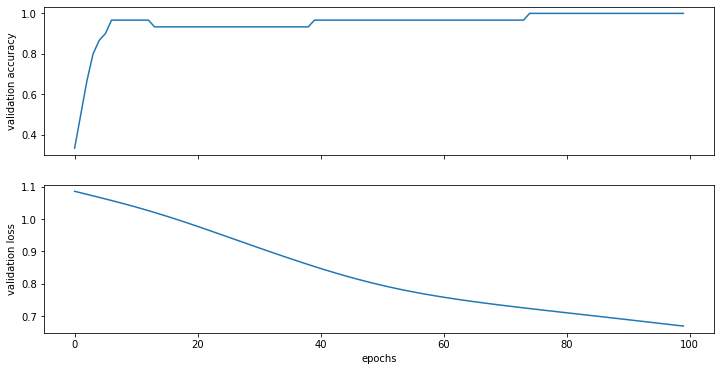

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs")
